# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.086302e+01     7.077530e+00
 * time: 0.004576921463012695
     1     2.912941e+01     5.561154e+00
 * time: 0.017103910446166992
     2     1.729897e+01     3.867899e+00
 * time: 0.04027390480041504
     3     1.343896e+01     3.381375e+00
 * time: 0.059751033782958984
     4     1.312514e+01     4.222765e+00
 * time: 0.07527709007263184
     5     1.266218e+01     3.252626e+00
 * time: 0.09079694747924805
     6     1.142410e+01     1.810236e+00
 * time: 0.10651612281799316
     7     1.038422e+01     1.513200e+00
 * time: 0.12213802337646484
     8     9.621920e+00     1.398487e+00
 * time: 0.1378951072692871
     9     9.329901e+00     7.348459e-01
 * time: 0.15375995635986328
    10     9.328757e+00     1.455903e+00
 * time: 0.16618609428405762
    11     9.166518e+00     8.533996e-01
 * time: 0.17894196510314941
    12     9.030972e+00     8.983618e-01
 * time: 0.2487480640411377
    13     8.842415e+00     1.003504e+00
 * time

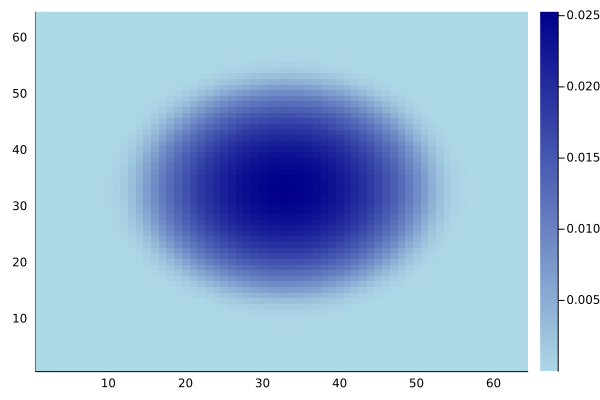

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)